<a href="https://colab.research.google.com/github/YomarPeralta/Laboratorio-Unidad-2/blob/main/%5BNRC_6292%5D_YomarPeralta_Lab1Unidad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
'''Carga de las librerias necesarias para proceder a trabajar con los calculos de los Arboles de desisiones'''

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [38]:
''' Cargamos el dataset y mandamos a imprimir el mismo '''
'''Los datos que se han ingresado inicialmente en el sistema son: 
No. de Paciente, Nivel de Azúcar en Sangre, Edad, Género, Índice de Creatinina (Cr), 
Masa Corporal índice (IMC), urea, colesterol (Chol), perfil de lípidos en ayunas, incluidos total, 
LDL, VLDL, triglicéridos (TG) y colesterol HDL, HBA1C, clase (del paciente)'''
pima = pd.read_csv("diabetes.csv")
pima.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [39]:
'''  '''
pima['CLASS']= pima['CLASS'].str.strip()

In [40]:
'''Tranformacion de los datos string a numericos (mapear)'''
d2 = {'N': 1, 'P': 0, 'Y':2}
pima['CLASS'] = pima['CLASS'].map(d2)
pima.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,1
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,1


In [41]:
''' Definicion de las variables de entrada (variables dependientes) y la etiqueta de salida respuesta variable independiente'''
feature_cols = [ 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c','Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
X = pima[feature_cols]
y = pima.CLASS

In [42]:
'''Definicion de los componentes para poder trabajar con este modelo de algoritmo 
La cual consiste en el 70 para poder entrenar y el 30 para trabajar '''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
'''Creacion de los objetos y componentes para crear el arbol de decision'''
clf = DecisionTreeClassifier()
'''Entrenamiento de los componentes'''
clf = clf.fit(X_train,y_train)
''' Variable a predecir despues del entrenamiento de los datos'''
y_pred = clf.predict(X_test)

In [44]:
''' Calculo de las metricas de la aplicaciones del modelo presentado'''

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


## Visualizing the tree

We will plot the tree to see its root, branches, and nodes using the following functions:

* **StringIO()**: creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format.
* **export_graphviz()**: this function exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’.
* **graph_from_dot_data()**: will use the DOT object to create the graph.
* **Image()**: uses raw data to return an image (png, jpeg, gif).

In [45]:

'''Importacion de las librerias necesarias para poder crear 
el resultado final visual graficamente del algoritmo arbol de desiciones'''
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

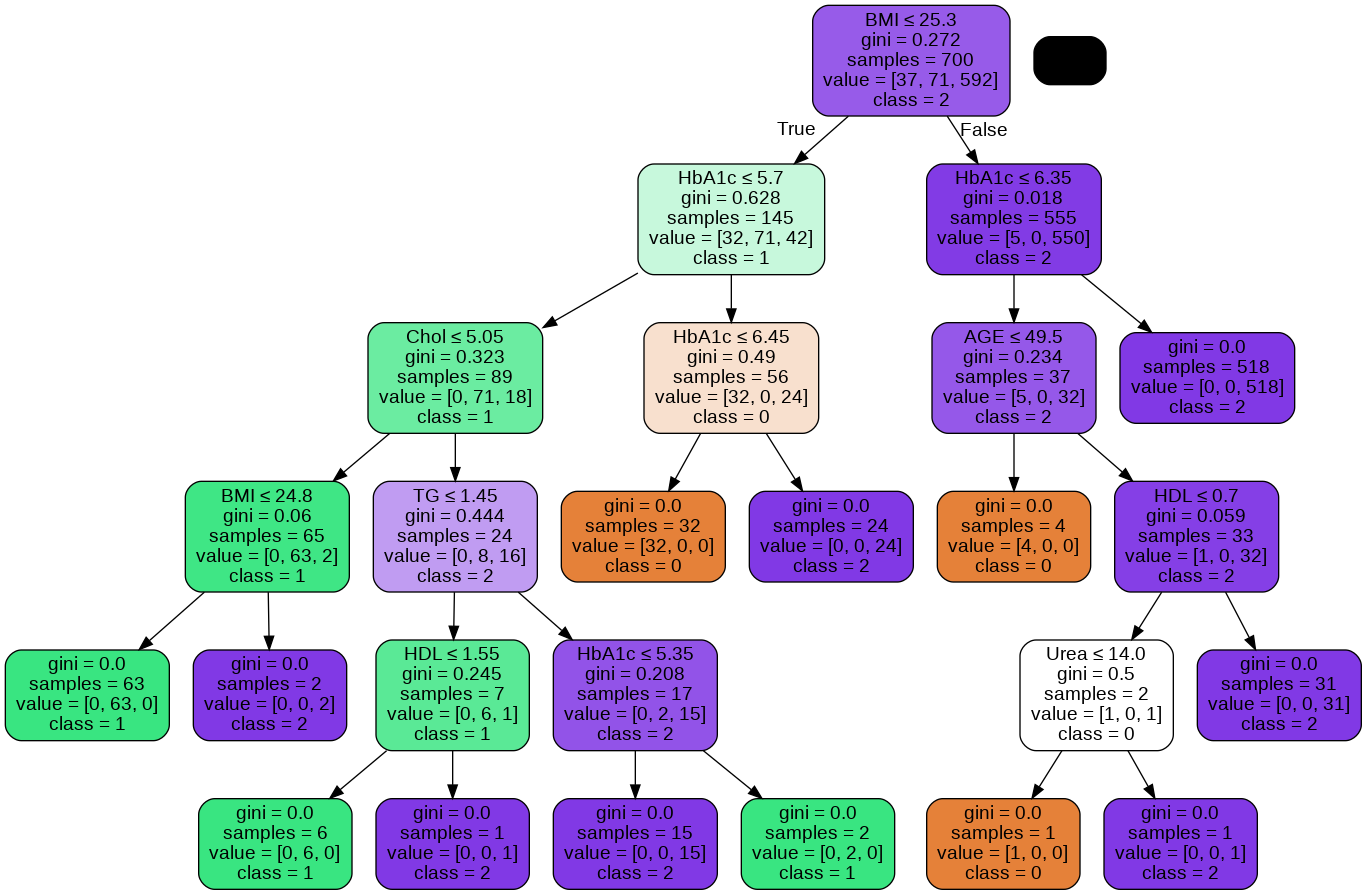

In [48]:
'''Visualiacion del resultado final grafico del arbol de desicion'''

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Pruning

The complete decision tree is difficult to interpret due to the complexity of the outcome. Pruning/shortening a tree is essential to ease our understanding of the outcome and optimize it. This optimization can be done in one of three ways:

* **criterion**: optional (default="gini") or Choose attribute selection measure

Defines what function will be used to measure the quality of a split. The options are "gini" and "entropy". The Gini ratio measures the impurity of the node in a decision tree. One can assume that a node is pure when all of its records belong to the same class.

* **splitter**: string, optional (default="best") or Split Strategy

Defines the strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

* **max_depth**: int or None, optional (default=None) or Maximum Depth of a Tree

Defines the maximum depth of the tree. If it’s None, the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model).

In [51]:
'''Creacion del objeto arbol de decision '''
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

'''Entrenamiento de los componentes del arbol de desicion'''
clf = clf.fit(X_train,y_train)

'''Variable predecida'''
y_pred = clf.predict(X_test)

'''Calculo de las metricas'''
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533333333333334


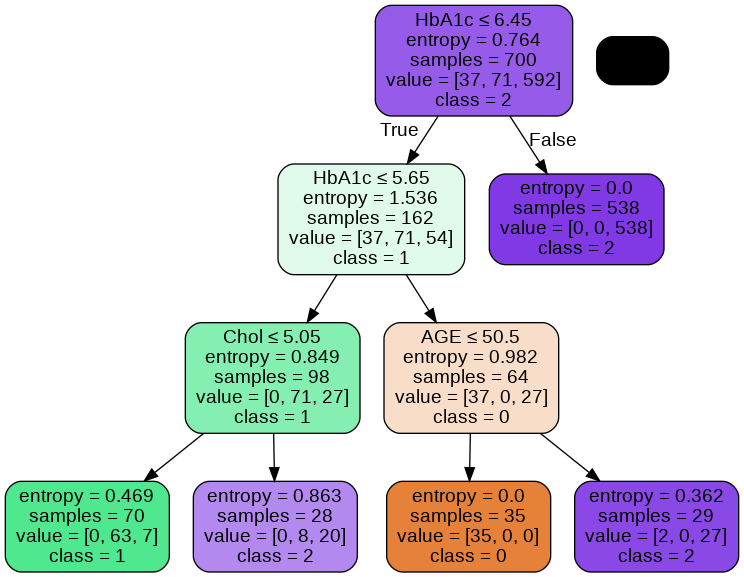

In [53]:
'''Visualizacion de la podada del resultado anterior del arbol de desicion'''

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())